In [1]:
import os, tqdm, time, random
import cv2 as cv
import numpy as np
import pandas as pd
import nibabel as nib
import tensorflow as tf
from matplotlib import pyplot as plt
from IPython.display import clear_output
from tensorflow.keras import models, layers, losses, optimizers

from loss import *
from utils import *
from metric import *
from network import *

random.seed(777)
tf.set_random_seed(777)
np.random.seed(777)



In [ ]:
root_dir = '../data/for_section/'

fold_idx = 1

train_path = os.path.join(root_dir, 'for_fold_%d'%fold_idx)

val_path = os.path.join(root_dir, 'for_fold_%d_val'%fold_idx)

total = data_loader(train_path)

data = []
label = []
n_size = 32
n_slice = 16
cs_strides = 16
a_strides = 2

#print(test.shape)

for i in range(2):
    test = total[i]
    cor, sag, axi = test.shape
    means = [test[idx:idx+n_size, jdx:jdx+n_size, kdx:kdx+(n_slice*6)].mean() 
             for idx in range(0, cor-n_size, cs_strides) 
             for jdx in range(0, sag-n_size, cs_strides) 
             for kdx in range(0, axi-(n_slice*6), a_strides)]


    for idx in tqdm.tqdm_notebook(range(0, cor-n_size, cs_strides)):
        for jdx in range(0, sag-n_size, cs_strides):
            for kdx in range(0, axi-(n_slice*6), a_strides):
                tmp = test[idx:idx+n_size, jdx:jdx+n_size, kdx:kdx+(n_slice*6)]
                if tmp.mean() > np.mean(means)+10:
                    label.append(tmp)
                    tmp = np.array(np.dsplit(tmp, n_slice))
                    tmp = tmp.mean(axis=-1)
                    tmp = np.transpose(tmp, [1,2,0])
                    data.append(tmp)
                
label = np.array(label)[..., np.newaxis]
data = np.array(data)[..., np.newaxis]
print(data.shape)
print(label.shape)


# Prepare Validation
val_data = []
val_label = []

# Prepare Validation
scan_list = sorted(os.listdir(val_path))[1:3]
for scan in scan_list:
    dante_path = os.path.join(val_path, scan, 'T1SPACE09mmISOPOSTwDANTE')
    img_name = [i for i in os.listdir(dante_path) if '.nii' in i and '_rsl' not in i][0]
    #print(img_name)
    val = nib.load(os.path.join(dante_path, img_name))
    val = check_data(val.get_data())

cor, sag, axi = test.shape
#print(test.shape)
for idx in tqdm.tqdm_notebook(range(0, cor-n_size, cs_strides)):
    for jdx in range(0, sag-n_size, cs_strides):
        for kdx in range(0, axi-(n_slice*6), a_strides):
            tmp = val[idx:idx+n_size, jdx:jdx+n_size, kdx:kdx+(n_slice*6)]
#             means.append(tmp.mean())
            if tmp.mean() > 225:
                val_label.append(tmp)
                tmp = np.array(np.dsplit(tmp, n_slice))
                tmp = tmp.mean(axis=-1)
                tmp = np.transpose(tmp, [1,2,0])
                val_data.append(tmp)
                
val_label = np.array(val_label)[..., np.newaxis]
val_data = np.array(val_data)[..., np.newaxis]
print(val_data.shape)
print(val_label.shape)

In [2]:
data_root = '../data/Original/'
data_lists = sorted(os.listdir(data_root))
ph15_lists = [i for i in data_lists if '_philips_15' in i]
ph3_lists = [i for i in data_lists if '_philips_3' in i]
si15_lists = [i for i in data_lists if '_siemens_15' in i]
si3_lists = [i for i in data_lists if '_siemens_3' in i]
ge15_lists = [i for i in data_lists if '_ge_15' in i]
ge3_lists = [i for i in data_lists if '_ge_3' in i]

train_list = ['CC0001', 'CC0060', 'CC0120', 'CC0180', 'CC0241', 'CC0300']

val_list = ['CC0002', 'CC0061', 'CC0121', 'CC0181', 'CC0242', 'CC0301']

print(len(data_lists))
print(len(ph15_lists))
print(len(ph3_lists))
print(len(ge15_lists))
print(len(ge3_lists))
print(len(si15_lists))
print(len(si3_lists))

train_img = {name : nib.load(os.path.join(data_root, name)).get_data().astype(np.uint16) 
             for name in data_lists if name.split('_')[0] in train_list}


data = []
label = []
n_size = 32
n_slice = 16
cs_strides = 16
a_strides = 2

#print(test.shape)

for i in train_img:
    test = train_img[i]
    cor, sag, axi = test.shape
    means = [test[idx:idx+n_size, jdx:jdx+n_size, kdx:kdx+(n_slice*6)].mean() 
             for idx in range(0, cor-n_size, cs_strides) 
             for jdx in range(0, sag-n_size, cs_strides) 
             for kdx in range(0, axi-(n_slice*6), a_strides)]
    print(np.mean(means))
    for idx in tqdm.tqdm_notebook(range(0, cor-n_size, cs_strides)):
        for jdx in range(0, sag-n_size, cs_strides):
            for kdx in range(0, axi-(n_slice*6), a_strides):
                tmp = test[idx:idx+n_size, jdx:jdx+n_size, kdx:kdx+(n_slice*6)]
                if tmp.mean() > np.mean(means)+10:
                    label.append(tmp)
                    tmp = np.array(np.dsplit(tmp, n_slice))
                    tmp = tmp.mean(axis=-1)
                    tmp = np.transpose(tmp, [1,2,0])
                    data.append(tmp)
                
label = np.array(label)[..., np.newaxis]
data = np.array(data)[..., np.newaxis]
print(data.shape)
print(label.shape)

val_img = {name : nib.load(os.path.join(data_root, name)).get_data().astype(np.uint16) 
             for name in data_lists if name.split('_')[0] in val_list}


val_data = []
val_label = []
cs_strides = 16
a_strides = 8
#print(test.shape)

for i in val_img:
    test = val_img[i]
    cor, sag, axi = test.shape
    means = [test[idx:idx+n_size, jdx:jdx+n_size, kdx:kdx+(n_slice*6)].mean() 
             for idx in range(0, cor-n_size, cs_strides) 
             for jdx in range(0, sag-n_size, cs_strides) 
             for kdx in range(0, axi-(n_slice*6), a_strides)]
    print(np.mean(means))
    for idx in tqdm.tqdm_notebook(range(0, cor-n_size, cs_strides)):
        for jdx in range(0, sag-n_size, cs_strides):
            for kdx in range(0, axi-(n_slice*6), a_strides):
                tmp = test[idx:idx+n_size, jdx:jdx+n_size, kdx:kdx+(n_slice*6)]
                if tmp.mean() > np.mean(means)+10:
                    val_label.append(tmp)
                    tmp = np.array(np.dsplit(tmp, n_slice))
                    tmp = tmp.mean(axis=-1)
                    tmp = np.transpose(tmp, [1,2,0])
                    val_data.append(tmp)
                
val_label = np.array(val_label)[..., np.newaxis]
val_data = np.array(val_data)[..., np.newaxis]
print(val_data.shape)
print(val_label.shape)

359
59
60
60
60
60
60
449.3414619375159



543.6335396823721



128.32333037240164



84.75040168762206



489.97346868226026



1574.9824064659351



(32215, 32, 32, 16, 1)
(32215, 32, 32, 96, 1)
527.2531491915385



347.0811875867708



118.36389762515113



77.88824086567712



533.4566154347871



1582.045390747716



(8074, 32, 32, 16, 1)
(8074, 32, 32, 96, 1)


In [5]:
G = SR3D(layer_activation='leaky_relu', 
             name='3D_SR_Gen')
D = dis3D(name='3D_SR_Dis')

D.compile(optimizer=optimizers.Adam(lr=0.0001, epsilon=1e-8), loss=losses.binary_crossentropy)

D.trainable=False

A = models.Model(inputs=G.input, outputs = [G.output, D(G.input)], name='GAN')
A.compile(optimizer=optimizers.Adam(lr=0.0001, epsilon=1e-8), loss=[mse_grad_loss, losses.binary_crossentropy], 
          loss_weights=[10, 1], metrics={'3D_SR_Gen_output_act':[mutual_information, gradient_3d_loss, psnr]})



In [6]:
date = time.ctime().split(' ')

ckpt_root = './checkpoint/%s_%02d_%s/DeepSRGAN_msegrad_CC_6data'%(date[1], int(date[2]), date[-1])
result_root = './result/%s_%02d_%s/DeepSRGAN_msegrad_CC_6data'%(date[1], int(date[2]), date[-1])

try:
    os.makedirs(ckpt_root)
    print("\nMake Save Directory!\n")
except:
    print("\nDirectory Already Exist!\n")

try:
    os.makedirs(result_root)
    print("\nMake Save Directory!\n")
except:
    print("\nDirectory Already Exist!\n")
    

model_json = A.to_json()
with open(os.path.join(ckpt_root, "model.json"), "w") as json_file:
    json_file.write(model_json)
print("\nModel Saved!\n")


Make Save Directory!


Make Save Directory!


Model Saved!



In [7]:
epochs=100
batch_size = 4
train_length = len(data)
val_length = len(val_data)
num_iter = int(np.ceil(train_length/batch_size))
num_val_iter = int(np.ceil(val_length/batch_size))

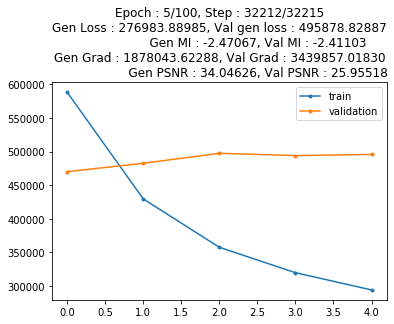

Saved Model with 470218.44996!


In [8]:
train_loss = {"Generator_Total" : [], "Generator_Style" : [], "Generator_AD" : [], "mi": [], "mse": [], "grad": [], "psnr": [], "Discriminator_AD" : []}
val_loss = {"Generator_Total" : [], "Generator_Style" : [], "Generator_AD" : [], "mi": [], "mse": [], "grad": [], "psnr": []}
top_gen_loss = float('inf')
stop_patience = 5
stop_cnt = 0
save_patience = 2
save_cnt = 0
top_epoch = 0
prev_val_loss = 0
prev_val_mi = 0
prev_val_grad = 0
prev_val_psnr = 0


for epoch in range(epochs):
    epoch_t_g_total = 0
    epoch_t_g_style = 0
    epoch_t_g_dis = 0
    epoch_t_d_dis = 0
    epoch_t_mse = 0
    epoch_t_mi = 0
    epoch_t_grad = 0
    epoch_t_psnr = 0
    
    shuffle_idx = np.random.choice(train_length, train_length, replace=False)
    for i, step in enumerate(range(0, train_length, batch_size)):

        #print(step, shuffle_idx[step:step+batch_size])

        # Generate fake images
        step_idx = shuffle_idx[step:step+batch_size]
        fake_imgs = G.predict(data[step_idx])

        # Train Discriminator
        dis_input = np.concatenate([fake_imgs, label[step_idx]])
        dis_label =np.concatenate([np.zeros((len(step_idx), 1)),
                                 np.ones((len(step_idx), 1))])
        Dis_Loss = D.train_on_batch(dis_input, dis_label)

        # Train Generator
        Gan_Loss = A.train_on_batch(data[step_idx], [label[step_idx], np.ones((len(step_idx), 1))])
        
        epoch_t_g_total += Gan_Loss[0]
        epoch_t_g_style += Gan_Loss[-5]
        epoch_t_g_dis += Gan_Loss[-4]
        epoch_t_mse += np.mean(np.square(fake_imgs-label[step_idx]))
        epoch_t_mi += Gan_Loss[-3]
        epoch_t_grad += Gan_Loss[-2]
        epoch_t_psnr += Gan_Loss[-1]
        epoch_t_d_dis += Dis_Loss
        
        clear_output(wait=True)
        plt.plot(train_loss["Generator_Style"], '.-')    
        plt.plot(val_loss["Generator_Style"], '.-')
        #plt.suptitle('Epoch : {}/{}, Step : {}/{}'.format())
        plt.title("Epoch : %d/%d, Step : %d/%d\nGen Loss : %.5f, Val gen loss : %.5f\n\
                    Gen MI : %.5f, Val MI : %.5f\nGen Grad : %.5f, Val Grad : %.5f\n\
                    Gen PSNR : %.5f, Val PSNR : %.5f"
                  %(epoch, epochs, step, train_length, 
                    epoch_t_g_style/(i+1), prev_val_loss, 
                    epoch_t_mi/(i+1), prev_val_mi, 
                    epoch_t_grad/(i+1), prev_val_grad, 
                    epoch_t_psnr/(i+1), prev_val_psnr))
        plt.legend(['train', 'validation'], loc='upper right')
        plt.show()
    
    train_loss["Generator_Total"].append(epoch_t_g_total/num_iter)
    train_loss["Generator_Style"].append(epoch_t_g_style/num_iter)
    train_loss["Generator_AD"].append(epoch_t_g_dis/num_iter)
    train_loss["Discriminator_AD"].append(epoch_t_d_dis/num_iter)
    train_loss["mse"].append(epoch_t_mse/num_iter)
    train_loss["mi"].append(epoch_t_mi/num_iter)
    train_loss["grad"].append(epoch_t_grad/num_iter)
    train_loss["psnr"].append(epoch_t_psnr/num_iter)
    
    
    epoch_v_g_total = 0
    epoch_v_g_style = 0
    epoch_v_g_dis = 0
    epoch_v_mse = 0
    epoch_v_mi = 0
    epoch_v_grad = 0
    epoch_v_psnr = 0
    
    for j, val_idx in enumerate(range(0, val_length, batch_size)):
        #val_idx = j
        val_y2 = np.ones([len(val_data[val_idx:val_idx+batch_size]), 1])
        #print(j, val_idx, len(val_data[val_idx:val_idx+batch_size]))
        V_loss = A.test_on_batch(val_data[val_idx:val_idx+batch_size], 
                                           [val_label[val_idx:val_idx+batch_size], val_y2])
        V_output, _= A.predict(val_data[val_idx:val_idx+batch_size])
        #print("Validation Inference")
        epoch_v_g_total += V_loss[0]
        epoch_v_g_style += V_loss[-5]
        epoch_v_g_dis += V_loss[-4]
        epoch_v_mse += np.mean(np.square(V_output-val_label[val_idx:val_idx+batch_size]))
        epoch_v_mi += V_loss[-3]
        epoch_v_grad += V_loss[-2]
        epoch_v_psnr += V_loss[-1]
    
    val_loss["Generator_Total"].append(epoch_v_g_total/num_val_iter)
    val_loss["Generator_Style"].append(epoch_v_g_style/num_val_iter)
    val_loss["Generator_AD"].append(epoch_v_g_dis/num_val_iter)
    val_loss["mse"].append(epoch_v_mse/num_val_iter)
    val_loss["mi"].append(epoch_v_mi/num_val_iter)
    val_loss["grad"].append(epoch_v_grad/num_val_iter)
    val_loss["psnr"].append(epoch_v_psnr/num_val_iter)
    
    mean_val_loss = epoch_v_g_style/num_val_iter
    prev_val_loss = mean_val_loss
    prev_val_mi = epoch_v_mi/num_val_iter
    prev_val_grad = epoch_v_grad/num_val_iter
    prev_val_psnr = epoch_v_psnr/num_val_iter
    
    # Saving Phase
    if mean_val_loss < top_gen_loss:
        stop_cnt = 0
        top_gen_loss = mean_val_loss
        if epoch == 0: 
            A.save_weights(os.path.join(ckpt_root, "%05d_%.4f_%.4f.h5"%(epoch+1, epoch_t_g_style/num_iter, top_gen_loss)))
            top_epoch = epoch
        elif top_epoch + save_patience > epoch : pass
        else:
            A.save_weights(os.path.join(ckpt_root, "%05d_%.4f_%.4f.h5"%(epoch+1, epoch_t_g_style/num_iter, top_gen_loss)))
            top_epoch = epoch
    else:
        stop_cnt+=1
    
    if stop_cnt == stop_patience : break

print("Saved Model with %.5f!"%top_gen_loss)

train_df = pd.DataFrame(train_loss)
train_df.to_csv(os.path.join(result_root,'train_loss.csv'))

val_df = pd.DataFrame(val_loss)
val_df.to_csv(os.path.join(result_root, 'val_loss.csv'))

In [ ]:
scan_list = sorted(os.listdir(val_path))[1:]
for scan in scan_list:
    dante_path = os.path.join(val_path, scan, 'T1SPACE09mmISOPOSTwDANTE')
    img_name = [i for i in os.listdir(dante_path) if '.nii' in i and '_rsl' not in i][0]
    #print(img_name)
    val = nib.load(os.path.join(dante_path, img_name))
    val = check_data(val.get_data())
    
test_in = []
cor, sag, axi = val.shape
tmp = np.array(np.dsplit(val, axi//6))
tmp = tmp.mean(axis=-1)
tmp = np.transpose(tmp, [1, 2, 0])

#half_top = int(np.floor(tmp.shape[-1]/2))
#half_bot = int(np.ceil(tmp.shape[-1]/2))

In [ ]:
recon = np.zeros(shape=[cor, sag, axi])

slice_dict = {
    1:[[0, 160], [0, 160], [0, 128], [0, 128]], 
    2:[[0, 160], [96, 256], [0, 128], [32, 256]], 
    3:[[96, 256], [0, 160], [32, 256], [0, 128]],
    4:[[96, 256], [96, 256], [32, 256], [32, 256]]
}
test = {}
sli = 12
i = 0
for row in range(2):
    row_start = row*128
    for col in range(2):
        
        col_start = col*128
        print(i, row_start, col_start)
        test[i] = G.predict(tmp[np.newaxis, 
                                   slice_dict[i+1][0][0]:slice_dict[i+1][0][1],
                                   slice_dict[i+1][1][0]:slice_dict[i+1][1][1],
                                   :, np.newaxis])
        recon[row_start:row_start+128, 
              col_start:col_start+128] = test[i][0,
                                                  slice_dict[i+1][2][0]:slice_dict[i+1][2][1],
                                                  slice_dict[i+1][3][0]:slice_dict[i+1][3][1], :, 0]
        i += 1
# test_3d_2 = net.predict(tmp[np.newaxis, ..., half_top:, np.newaxis])

In [ ]:
aff = np.eye(4)
aff[2, 2]=6

nib.save(nib.Nifti1Image(tmp, aff), os.path.join(result_root, 'val_input.nii'))
nib.save(nib.Nifti1Image(recon, np.eye(4)), os.path.join(result_root, 'val_pred.nii'))
nib.save(nib.Nifti1Image(val, np.eye(4)), os.path.join(result_root, 'val_label.nii'))